Pregunta 1

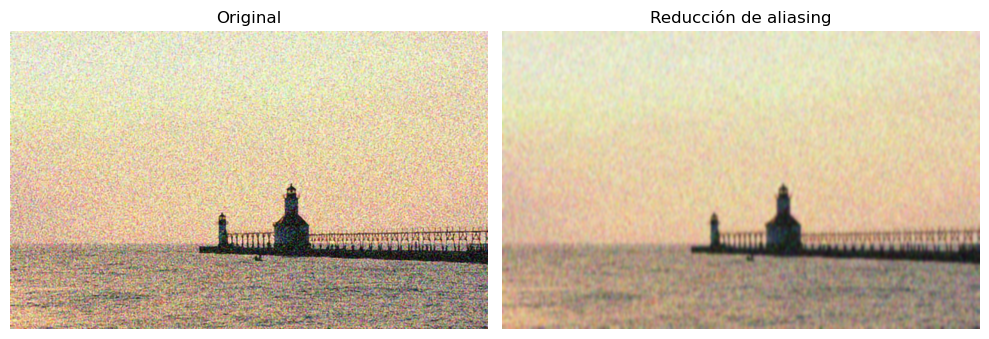

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('ruido.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gauss = cv2.GaussianBlur(img, (9, 15), 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reducción de aliasing')
plt.imshow(img_gauss)
plt.axis('off')

plt.tight_layout()
plt.show()


Pregunta 2

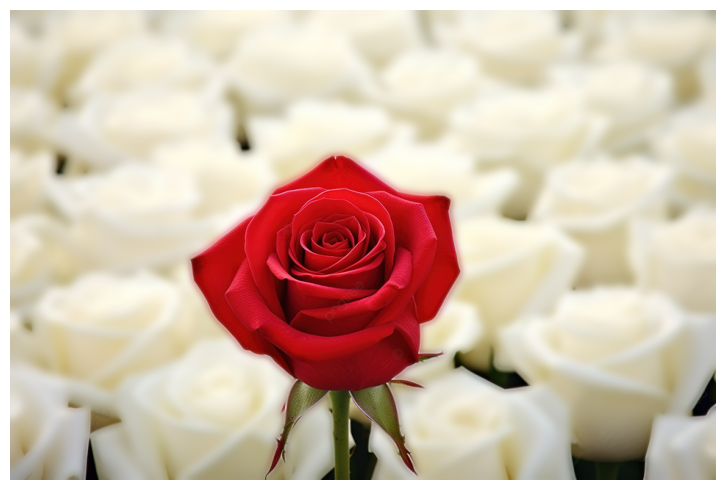

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rosa.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)
_, binarized = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, -1)
mask = cv2.GaussianBlur(mask, (11, 11), 0)
mask = mask.astype(float) / 255

img_blur = cv2.GaussianBlur(img_rgb, (35, 35), 0)
result = np.zeros_like(img_rgb, dtype=np.uint8)
for c in range(3):
    result[:, :, c] = (img_rgb[:, :, c] * mask + img_blur[:, :, c] * (1 - mask)).astype(np.uint8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.axis('off')
plt.tight_layout()
plt.show()


Pregunta 3

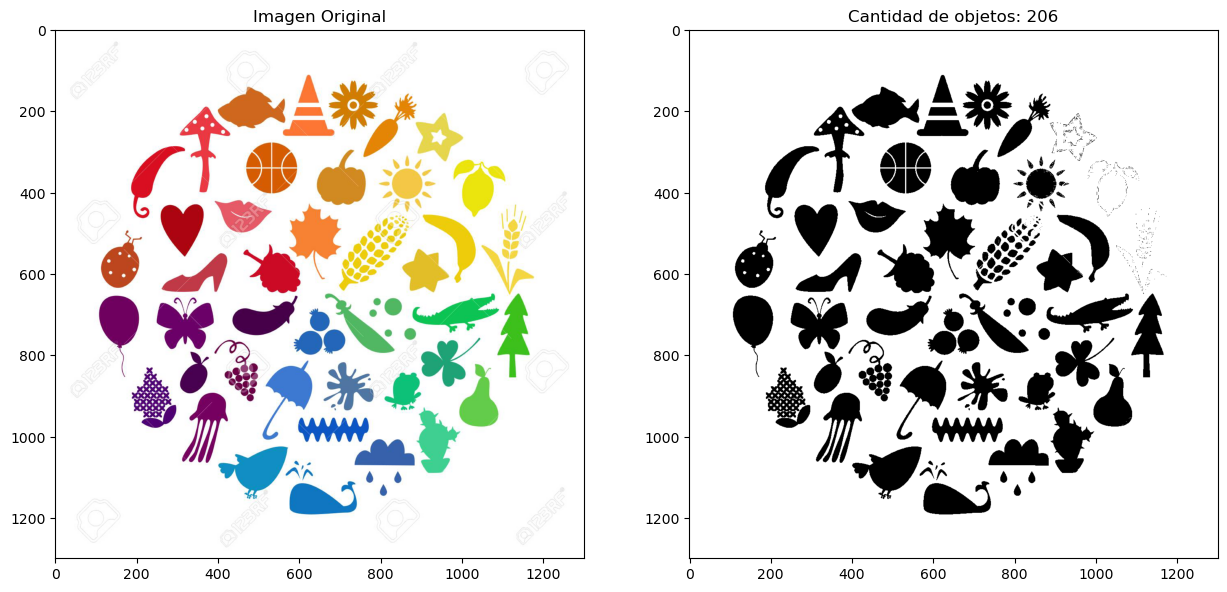

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    _, binarizar = cv2.threshold(gray, 201, 255, cv2.THRESH_BINARY)
    etiquetar = measure.label(binarizar, connectivity=2)
    num = np.max(etiquetar)
    return num,binarizar

imagen = cv2.imread('elementos.jpg')
num,binarizar = contar(imagen)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title(f'Cantidad de objetos: {num}')
plt.imshow(binarizar, cmap='gray')
plt.show()


Ejericicio 4 


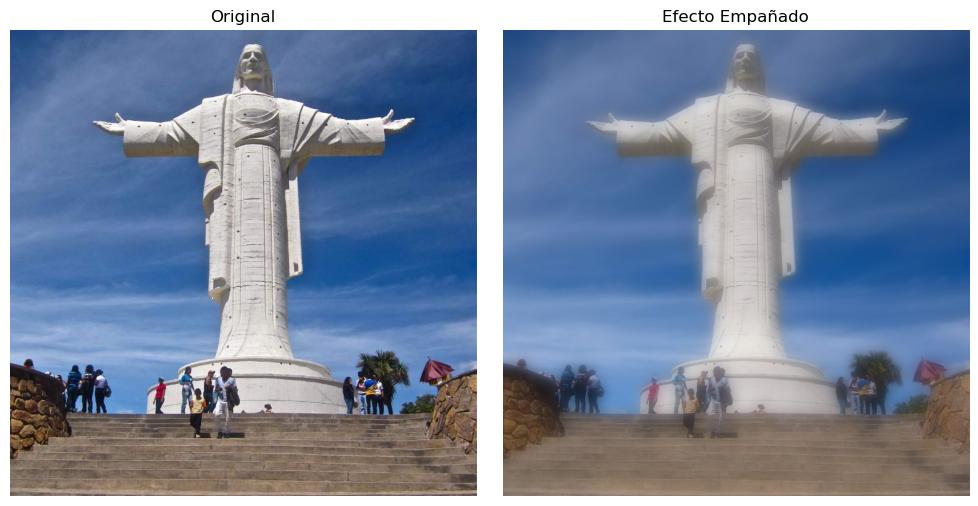

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cristo.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_blur = cv2.GaussianBlur(img, (75, 75), 0)

empañado = cv2.addWeighted(img, 0.3, img_blur, 0.7, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(empañado)
plt.title("Efecto Empañado")
plt.axis('off')

plt.tight_layout()
plt.show()


Ejercicio 5

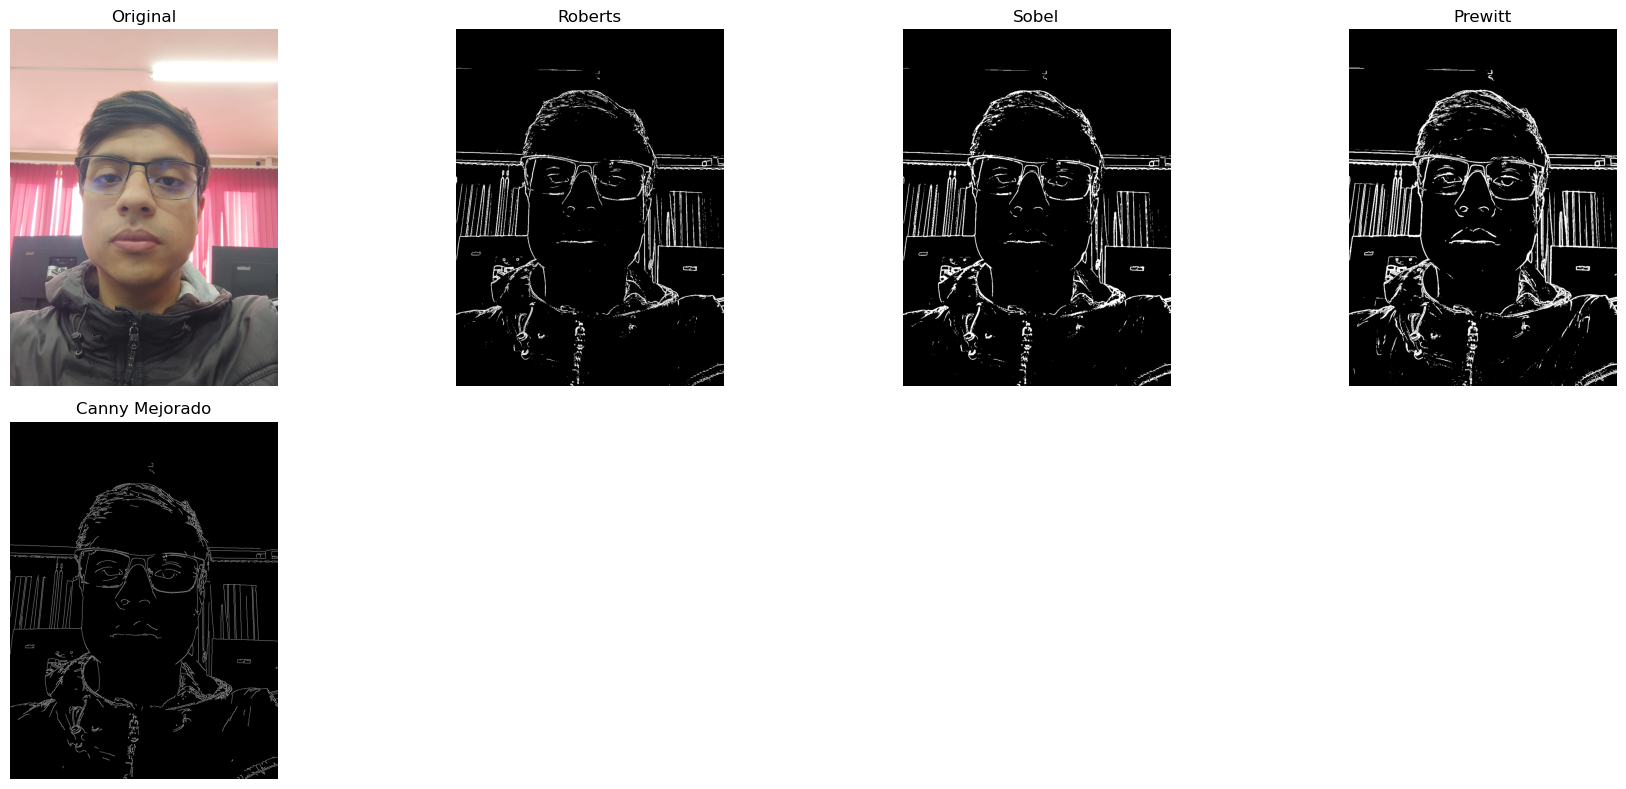

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)
    roberts = cv2.addWeighted(np.abs(robx), 0.5, np.abs(roby), 0.5, 0)
    roberts = np.uint8(np.clip(roberts, 0, 255))
    _, bordes = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bordes

def sobel_mejor(imagen, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    sx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    magnitud = np.sqrt(sx ** 2 + sy ** 2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    return bordes

def prewitt_mejor(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 1)
    px = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
    py = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)
    x = cv2.filter2D(img_gray, cv2.CV_64F, px)
    y = cv2.filter2D(img_gray, cv2.CV_64F, py)
    magnitud = np.sqrt(x**2 + y**2)
    magnitud = cv2.convertScaleAbs(magnitud)
    _, bordes = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bordes


imagen_color = cv2.imread('foto.jpeg')



imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)


roberts = roberts_mejorado(imagen_color)
sobel = sobel_mejor(imagen_color)
prewitt = prewitt_mejor(imagen_color)

imagen_suavizada = cv2.GaussianBlur(imagen_gris, (3, 3), 0)
bordes_canny = cv2.Canny(imagen_suavizada, 50, 100)




plt.figure(figsize=(18, 8))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(roberts, cmap='gray')
plt.title("Roberts")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(bordes_canny, cmap='gray')
plt.title("Canny Mejorado")
plt.axis('off')



plt.tight_layout()
plt.show()



Roberts
El operador Roberts primero convierte la imagen a escala de grises y aplica un suavizado gaussiano leve para reducir el ruido. Luego, utiliza dos pequeñas máscaras diagonales para detectar bordes en esas direcciones. Se calcula la magnitud del borde combinando los resultados de ambos gradientes. Finalmente, se aplica una binarización con umbral automático mediante el método de Otsu para obtener los bordes más relevantes.

Sobel
El operador Sobel comienza convirtiendo la imagen a escala de grises y aplicando un filtro gaussiano para eliminar el ruido. A continuación, calcula los gradientes en las direcciones horizontal y vertical usando el kernel de Sobel. La magnitud total del borde se obtiene combinando ambos gradientes. Después se normaliza la imagen resultante, se aplica umbral automático (Otsu) para detectar bordes fuertes y, por último, se utiliza una operación morfológica para cerrar pequeños espacios en los bordes.


Prewitt
El operador Prewitt convierte la imagen a escala de grises y la suaviza con un filtro gaussiano más amplio. Luego utiliza máscaras direccionales en X y Y para detectar los gradientes. Calcula la magnitud de los bordes combinando ambos gradientes. Finalmente, se aplica un umbral automático con Otsu para extraer los bordes principales de la imagen.

Canny
Para aplicar un Canny mejorado, primero se convierte la imagen a escala de grises. Luego se aplica un filtro gaussiano para reducir el ruido de baja frecuencia. Si aún hay presencia de puntos ruidosos, se puede utilizar un filtro de mediana adicional para eliminarlos. Después, se aplica el operador Canny con dos umbrales definidos que controlan la sensibilidad del detector. Este método permite encontrar bordes precisos y bien definidos, destacando los contornos más relevantes, como los de una cara o detalles finos de una escena.

Laplaciano
El operador Laplaciano es un detector de bordes basado en la segunda derivada. Primero se convierte la imagen a escala de grises, y luego se aplica directamente el operador Laplaciano. Este operador resalta regiones donde ocurre un cambio abrupto de intensidad, es decir, donde se encuentran los bordes. Al ser sensible al ruido, se recomienda suavizar la imagen previamente para obtener mejores resultados. Finalmente, se toma el valor absoluto del resultado para visualizar correctamente los bordes.

Laplaciano del Gaussiano (LoG)
El método LoG combina dos pasos clave: primero, se aplica un filtro Gaussiano a la imagen para eliminar el ruido de alta frecuencia. Este paso es fundamental porque el Laplaciano es muy sensible al ruido. Luego, se aplica el operador Laplaciano a la imagen suavizada. Este enfoque mejora la detección de bordes finos y elimina falsos positivos causados por pequeñas variaciones en la imagen. Es ideal para detectar contornos suaves con mayor precisión y menor sensibilidad al ruido.

Ejercicio 6


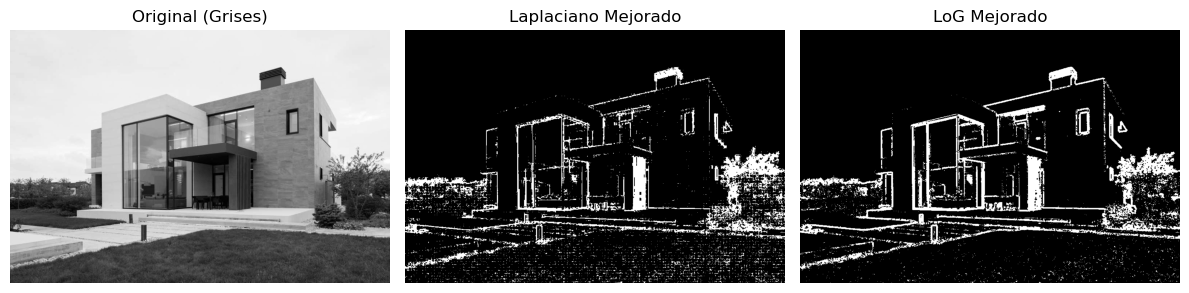

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplaciano_mejorado(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    laplaciano = cv2.Laplacian(imagen_gris, cv2.CV_64F)
    laplaciano = np.uint8(np.absolute(laplaciano))
    _, bordes = cv2.threshold(laplaciano, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel)
    return bordes

def log_mejorado(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizada = cv2.GaussianBlur(imagen_gris, (21, 21), 1)
    log = cv2.Laplacian(suavizada, cv2.CV_64F)
    log = np.uint8(np.absolute(log))
    _, bordes = cv2.threshold(log, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel)
    return bordes


imagen_color = cv2.imread('casa.jpg')

laplaciano = laplaciano_mejorado(imagen_color)
log = log_mejorado(imagen_color)
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original (Grises)")
plt.imshow(imagen_gris, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Laplaciano Mejorado")
plt.imshow(laplaciano, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("LoG Mejorado")
plt.imshow(log, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
